# **Tema 3: Ejercicios sobre la matriz de proyeción perspectiva**

Visión Tridimensional 2022-23<br>
Máster Visión Artificial, Universidad Rey Juan Carlos (URJC)


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as ppl
#matplotlib tk



## **Ejercicio 1**. Construir la matriz de proyección a partir de K, R y t

In [2]:
# Intrínsecos: 
K = np.array([[423.42092368,   0.,         152.35218312],
               [0.,         423.42092368, 127.06128654],
               [0.,           0.,           1.,        ]])
 
# Extrínsecos
rvecs = np.array([[ 1.86618872],
                 [ 1.06633095],
                 [-0.14017476]])
R, _ = cv2.Rodrigues(rvecs)                 
t    = np.array([[ -25.99820477],
                 [ -28.60128287],
                 [524.11289306]])

print("K=\n", K)
print("R=\n", R)
print("t=\n", t)

K=
 [[423.42092368   0.         152.35218312]
 [  0.         423.42092368 127.06128654]
 [  0.           0.           1.        ]]
R=
 [[ 0.61338834  0.719441    0.3258211 ]
 [ 0.61079218 -0.17058971 -0.77319601]
 [-0.50068718  0.6732784  -0.54406668]]
t=
 [[-25.99820477]
 [-28.60128287]
 [524.11289306]]


Comprobar que la matriz de rotación R es ortonormal:

In [4]:
print(R @ R.T)

[[ 1.00000000e+00 -1.14316244e-16  1.18716282e-16]
 [-1.14316244e-16  1.00000000e+00  7.14173685e-17]
 [ 1.18716282e-16  7.14173685e-17  1.00000000e+00]]


Construye la matriz de proyección en Python utilizando los elementos anteriores:

In [7]:
P = K @ np.hstack((R, t))
print("P=", P)

P= [[ 1.83440674e+02  4.07201806e+02  5.50697235e+01  6.88415596e+04]
 [ 1.95004232e+02  1.33163653e+01 -3.96517179e+02  5.44840769e+04]
 [-5.00687180e-01  6.73278396e-01 -5.44066678e-01  5.24112893e+02]]


## **Ejercicio 2**. Proyecta los puntos de la plantilla de calibración 

El centro del sistema de referencia de la escena, esto es, el punto de coordenadas $[0, 0, 0]^\top$, es la primera esquina de la plantilla de calibración detectada en todas las imágenes. También consideraremos que el eje X corresponde al lado corto de la plantilla de calibración, y el eje Y al lado largo. Esta disposición implica que el eje Z apunta en la dirección
normal hacia arriba del plano de calibración.

Cada escaque de la rejilla de calibración tiene 30 mm de lado. Así que vamos a proyectar algunos de los puntos 3D de la plantilla de calibración sobre la imagen: $[0, 0, 0]^\top$, $[0, 30, 0]^\top$, $[30, 30, 0]^\top$, $[30, 0, 0]^\top$.


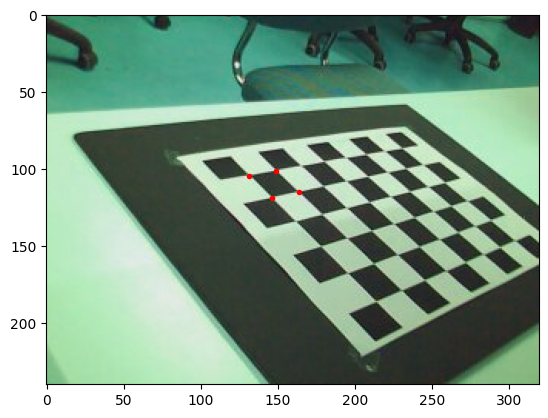

In [11]:
img = cv2.imread("left_000.jpg")


points3D = np.array([[0, 0, 0, 1], [0, 30, 0, 1], [30, 30, 0, 1], [30, 0, 0, 1]]).T

# Generar los puntos 2D en homogéneas en la variable:
points2D = P @ points3D
points2D /= points2D[2]


ppl.figure()
ppl.imshow(img)
ppl.plot(points2D[0,:], points2D[1,:], '.r')

## **Ejercicio 3**. Dibuja en la imagen la proyección del Sistema de Referencia de la escena.

Proyectando puntos 3D y uniéndolos mediante líneas pinta los ejes. El X en rojo, el Y en verde y el Z en azul (XYZ -> RGB)

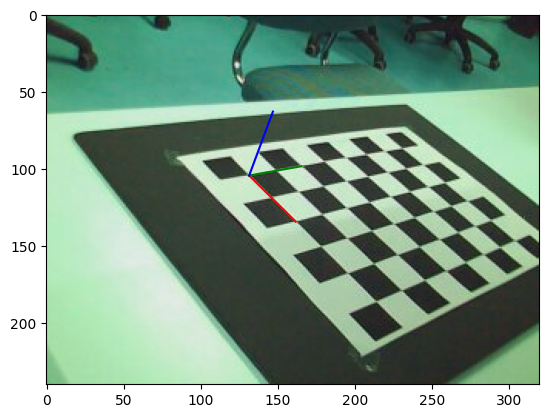

In [27]:
img = cv2.imread("left_000.jpg")

# Generar los puntos 3D en los ejes y proyectarlos sobre la imagen.
points3D = np.array([[60, 0, 0, 1], [0, 60, 0, 1], [0, 0, 60, 1], [0, 0, 0, 1]]).T
points2D = P @ points3D
points2D /= points2D[2]

ppl.figure()
ppl.imshow(img)

# Plot the axis projection
ppl.plot((points2D[0][0], points2D[0][3]), (points2D[1][0], points2D[1][3]), '-r')
ppl.plot((points2D[0][1], points2D[0][3]), (points2D[1][1], points2D[1][3]), '-g')
ppl.plot((points2D[0][2], points2D[0][3]), (points2D[1][2], points2D[1][3]), '-b')

## **Ejercicio 4**. Recupera K, R y t a partir de P

Pista: cv2.decomposeProjectionMatrix

In [28]:
# Use cv2.decomposeProjectionMatrix(P)
K_opencv, R_opencv, t_opencv, rotMX, rotMY, rotMZ, eulerAngles = cv2.decomposeProjectionMatrix(P)
t_opencv = t_opencv/t_opencv[3]
C_opencv = t_opencv

print(np.all(R - R_opencv) < 0.00000001)

print("K_opencv\n=", K_opencv)
print("R_opencv\n=", R_opencv)
print("C_opencv\n=", C_opencv) 
print("K\n=", K)
print("R\n=", R)
print("t\n=", t)
C = - R.T @ t
print("C\n=",C)

True
K_opencv
= [[ 4.23420924e+02 -1.42108547e-13  1.52352183e+02]
 [ 0.00000000e+00  4.23420924e+02  1.27061287e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
R_opencv
= [[ 0.61338834  0.719441    0.3258211 ]
 [ 0.61079218 -0.17058971 -0.77319601]
 [-0.50068718  0.6732784  -0.54406668]]
C_opencv
= [[ 295.833042  ]
 [-339.04879792]
 [ 271.50872656]
 [   1.        ]]
K
= [[423.42092368   0.         152.35218312]
 [  0.         423.42092368 127.06128654]
 [  0.           0.           1.        ]]
R
= [[ 0.61338834  0.719441    0.3258211 ]
 [ 0.61079218 -0.17058971 -0.77319601]
 [-0.50068718  0.6732784  -0.54406668]]
t
= [[-25.99820477]
 [-28.60128287]
 [524.11289306]]
C
= [[ 295.833042  ]
 [-339.04879792]
 [ 271.50872656]]


## **Ejercicio 5**. Calcular distancia de la cámara al sistema de referencia de la escena

Calcular la distancia entre los dos sistemas de referencia

In [ ]:
# Como C son las coordenadas de la cámara respecto (vector que une la camara con mi sistema de coordenadas) de la escena puedo hacer la norma y saco la distancia entre ambos sistemas.



## **Ejercicio 6**. Pintar en 3D la posición de la cámara en el S.R de la escena

En este ejercicio se pretente pintar en el sistema de referencia de la escena la posición de la cámara.

In [ ]:
def plot3DAxis(axes, Pts):
 
    # Eje X: punto en fila 0 - punto en fila 1
    x = np.array([Pts[0,0], Pts[1,0]]) 
    y = np.array([Pts[0,1], Pts[1,1]]) 
    z = np.array([Pts[0,2], Pts[1,2]]) 
    axes.plot3D(x, y, z, 'r')    

    # Eje Y: punto en fila 0 - punto en fila 2
    x = np.array([Pts[0,0], Pts[2,0]]) 
    y = np.array([Pts[0,1], Pts[2,1]]) 
    z = np.array([Pts[0,2], Pts[2,2]]) 
    axes.plot3D(x, y, z, 'g')    
    
    # Eje Z: punto en fila 0 - punto en fila 3
    x = np.array([Pts[0,0], Pts[3,0]]) 
    y = np.array([Pts[0,1], Pts[3,1]]) 
    z = np.array([Pts[0,2], Pts[3,2]]) 
    axes.plot3D(x, y, z, 'b')   

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Preparar para pintar en 3D
ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')

# Pintar los ejes del S.R. de la escena.
# Puntos que definen el sistema de referencia de la escena
Pts = np.array([[0, 0, 0, 1],   # origen
                [90, 0, 0, 1],  # Punto en eje X 
                [0, 90, 0, 1],  # Punto en eje Y
                [0, 0, 90, 1]]) # Punto en eje Z        
plot3DAxis(axes, Pts)

# Pintar en 3D, en el S.R. de la escena los 4 puntos del escaque del ejercicio 3
xx = ... # POR HACER!
yy = ... # POR HACER!
zz = ... # POR HACER!
axes.scatter3D(xx, yy, zz, 'b')    

# Encontrar la posición de la cámara en el S.R. de la escena
camera_sr_scene = ... # POR HACER!
axes.scatter3D(camera_sr_scene[0], camera_sr_scene[1], camera_sr_scene[2], 'k')   

# Para que la escala de los 3 ejes en la figura sea la misma (no cambiar)
scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz'])
axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)

## **Ejercicio 7**. Pintar en 3D el origen de coodenadas de la escena S.R. con respecto al de la cámara

En este ejercicio se pretente pintar la posición del origen de coordenadas del mundo (y sus ejes) en el sistema de referencia de la cámara. Además queremos pintar el S.R. de la cámara.

In [ ]:
# Preparar para pintar en 3D
ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')

# Matriz de transformación desde el S.R. de la escena al de la cámara. Es una matriz 4x4
# y recibe los puntos 3D en homogéneas (4x1) 
A = ... # POR HACER!

# Pintar los ejes del S.R. de la escena en el S.R. de la cámara.
Pts = np.array([[0, 0, 0, 1],   # origen
                [90, 0, 0, 1],  # Punto en eje X 
                [0, 90, 0, 1],  # Punto en eje Y
                [0, 0, 90, 1]]) # Punto en eje Z        
Pts_cam = np.dot(A, Pts.T).T
plot3DAxis(axes, Pts_cam)

# Pintar en 3D, en el S.R. de la cámara los 4 puntos del escaque del ejercicio 3
points3D_cam = np.dot(A, points3D.T).T
xx = points3D_cam[:,0]
yy = points3D_cam[:,1]
zz = points3D_cam[:,2]
axes.scatter3D(xx, yy, zz, 'b')    

# Encontrar y pintar la posición del S.R. de la escena en el de la cámara
scene_origin_in_cam = ... # POR HACER!
axes.scatter3D(scene_origin_in_cam[0], scene_origin_in_cam[1], scene_origin_in_cam[2], 'k')    

# Pintar los ejes del S.R. de la cámara.
Pts = np.array([[0, 0, 0, 1],   # origen
                [90, 0, 0, 1],  # Punto en eje X 
                [0, 90, 0, 1],  # Punto en eje Y
                [0, 0, 90, 1]]) # Punto en eje Z        
plot3DAxis(axes, Pts)


# Para que la escala de los 3 ejes sea la misma
scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz'])
axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
